### **BOSTON HOMES - first analysis**

DESCRIPTION: A real estate company wants to build homes at different locations in Boston. They have data for historical prices but have not decided the actual prices yet. They want to fix such a price for the homes that are affordable to the general public.

OBJECTIVES: 

• Import the Boston data from sklearn & read the description using DESCR.

• Analyze the data and predict the approximate prices for the houses.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

boston_dataset = load_boston()

# `load_boston` is deprecated

"DEPRECATED: load_boston is deprecated in 1.0 and will be removed in 1.2. The Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details."

In [128]:
# source: https://www.kaggle.com/puxama/bostoncsv

In [129]:
file_path = r"C:\Users\12489\Documents\Data\boston_housing_depreciated.csv"

df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [130]:
del df[df.columns[0]]

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [131]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

------------------

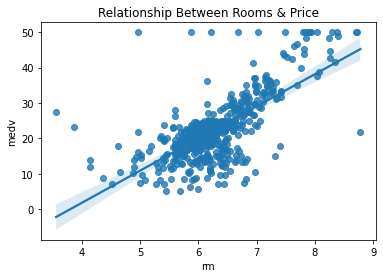

In [132]:
sns.regplot(x="rm", y="medv", data=df, fit_reg=True)
plt.title("Relationship Between Rooms & Price")
plt.show()

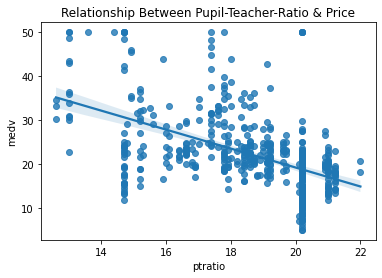

In [133]:
sns.regplot(x="ptratio", y="medv", data=df, fit_reg=True)
plt.title("Relationship Between Pupil-Teacher-Ratio & Price")
plt.show()

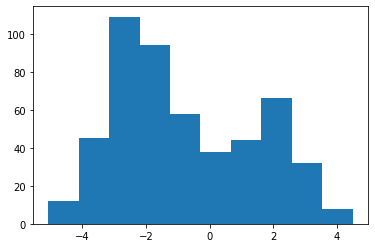

In [134]:
# plt.hist(df.crim)
# ^ since this is skewed, we need to transform ^

plt.hist(np.log(df.crim))
plt.show()

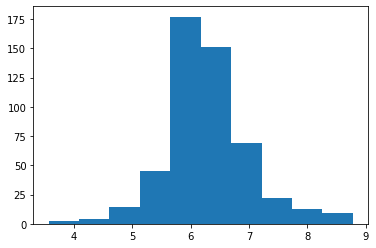

In [135]:
plt.hist(df.rm)
plt.show()

# since it isn't skewed, you don't need to log-transform

-----------------------

In [136]:
df_slim = df.iloc[:,[0,4,5,7,10,13]]

df_slim.head()

,crim,nox,rm,dis,ptratio,medv
0,0.00632,0.538,6.575,4.0900,15.3,24.0
1,0.02731,0.469,6.421,4.9671,17.8,21.6
2,0.02729,0.469,7.185,4.9671,17.8,34.7
3,0.03237,0.458,6.998,6.0622,18.7,33.4
4,0.06905,0.458,7.147,6.0622,18.7,36.2


In [137]:
df_slim['crim'] = np.log(df_slim.crim)

df_slim.head()

C:\Users\12489\AppData\Local\Temp\ipykernel_15320\4152961489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slim['crim'] = np.log(df_slim.crim)


,crim,nox,rm,dis,ptratio,medv
0,-5.064036,0.538,6.575,4.0900,15.3,24.0
1,-3.600502,0.469,6.421,4.9671,17.8,21.6
2,-3.601235,0.469,7.185,4.9671,17.8,34.7
3,-3.430523,0.458,6.998,6.0622,18.7,33.4
4,-2.672924,0.458,7.147,6.0622,18.7,36.2


In [138]:
df_slim.corr()

,crim,nox,rm,dis,ptratio,medv
crim,1.000000,0.788616,-0.306943,-0.681903,0.389554,-0.454302
nox,0.788616,1.000000,-0.302188,-0.769230,0.188933,-0.427321
rm,-0.306943,-0.302188,1.000000,0.205246,-0.355501,0.695360
dis,-0.681903,-0.769230,0.205246,1.000000,-0.232471,0.249929
ptratio,0.389554,0.188933,-0.355501,-0.232471,1.000000,-0.507787
medv,-0.454302,-0.427321,0.695360,0.249929,-0.507787,1.000000


----------------------

In [139]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [140]:
model = ols('medv ~ crim + nox + rm + dis + ptratio', df_slim).fit()

In [141]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          6.96e-104
Time:                        14:49:05   Log-Likelihood:                -1592.5
No. Observations:                 506   AIC:                             3197.
Df Residuals:                     500   BIC:                             3222.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4941      5.602      3.658      0.0

-------------------

In [142]:
predicted_prices = model.fittedvalues

predicted_prices.head()

0    29.943684
1    26.299936
2    31.468277
3    28.229220
4    28.970445
dtype: float64

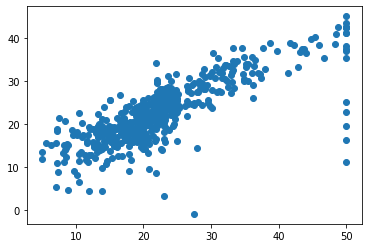

In [143]:
plt.scatter(df_slim.medv, predicted_prices)
plt.show()

--------------

In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
error = np.sqrt(mean_squared_error(df_slim.medv, predicted_prices))

error
# remember: in thousands of dollars

5.630715946690607

-----------------

In [146]:
# since we tested on the whole dataset, let's split

from sklearn.model_selection import train_test_split

X = df_slim.drop('medv',axis=1)
y=df_slim['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=3)

In [147]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred = linreg.predict(X_test)

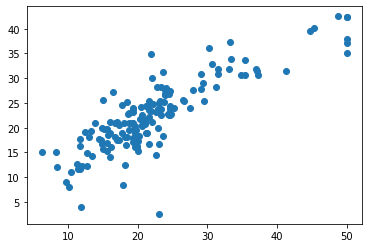

In [149]:
plt.scatter(y_test, y_pred)
plt.show()

In [150]:
np.sqrt(mean_squared_error(y_test, y_pred))

# remember: in thousands of dollars

4.765195949880316